In [6]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("/Users/mregan/Dev/Litmus-freqtrade-temp/")
print(Path.cwd())

pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

/Users/mregan/Dev/Litmus-freqtrade-temp


In [7]:
from pathlib import Path
from freqtrade.configuration import Configuration

In [8]:
# Customize these according to your needs.

# Initialize empty configuration object
config = Configuration.from_files([Path('user_data', 'strategies', 'VulcanPrimary.json')])

config["strategy"] = "VulcanPrimary"

# Location of the data
data_location = Path(config['user_data_dir'], 'data', 'binance')
# Pair to analyze - Only use one pair here
pair = "SOL/USDT"

In [9]:
# Load data using values set above
from freqtrade.data.history import load_pair_history

candles = load_pair_history(datadir=data_location,
                            timeframe=config["timeframe"],
                            pair=pair,
                            data_format = "json",
                            )

# Confirm success
print("Loaded " + str(len(candles)) + f" rows of data for {pair} from {data_location}")
candles.head()

Loaded 1240 rows of data for SOL/USDT from /Users/mregan/Dev/Litmus-freqtrade-temp/user_data/data/binance


,date,open,high,low,close,volume
0,2020-08-11 00:00:00+00:00,2.8500,3.4700,2.8433,3.0497,151914.09
1,2020-08-11 12:00:00+00:00,3.0497,3.5208,2.8625,3.2985,1400470.69
2,2020-08-12 00:00:00+00:00,3.2985,3.9289,3.0800,3.6842,1209918.28
3,2020-08-12 12:00:00+00:00,3.6733,3.9000,3.6000,3.7558,527124.67
4,2020-08-13 00:00:00+00:00,3.7500,4.1387,3.5003,3.8700,1069324.61


In [10]:
# Load strategy using values set above
from freqtrade.resolvers import StrategyResolver
from freqtrade.data.dataprovider import DataProvider
strategy = StrategyResolver.load_strategy(config)
strategy.dp = DataProvider(config, None, None)

strategy.bot_loop_start()

# Generate buy/sell signals using strategy
df = strategy.analyze_ticker(candles, {'pair': pair})
df.tail()

,date,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,RSI,RSI_SMA,SMA,growing_SMA,shrinking_SMA,slowd,slowk,stoch_sell_cross,buy_trigger,sell_trigger,date_btc_12h,open_btc_12h,high_btc_12h,low_btc_12h,close_btc_12h,volume_btc_12h,volume_adi_btc_12h,volume_obv_btc_12h,volume_cmf_btc_12h,volume_fi_btc_12h,volume_em_btc_12h,volume_sma_em_btc_12h,volume_vpt_btc_12h,volume_vwap_btc_12h,volume_mfi_btc_12h,volume_nvi_btc_12h,volatility_bbm_btc_12h,volatility_bbh_btc_12h,volatility_bbl_btc_12h,volatility_bbw_btc_12h,volatility_bbp_btc_12h,volatility_bbhi_btc_12h,volatility_bbli_btc_12h,volatility_kcc_btc_12h,volatility_kch_btc_12h,volatility_kcl_btc_12h,volatility_kcw_btc_12h,volatility_kcp_btc_12h,volatility_kchi_btc_12h,volatility_kcli_btc_12h,volatility_dcl_btc_12h,volatility_dch_btc_12h,volatility_dcm_btc_12h,volatility_dcw_btc_12h,volatility_dcp_btc_12h,volatility_atr_btc_12h,volatility_ui_btc_12h,trend_macd_btc_12h,trend_macd_signal_btc_12h,trend_macd_diff_btc_12h,trend_sma_fast_btc_12h,trend_sma_slow_btc_12h,trend_ema_fast_btc_12h,trend_ema_slow_btc_12h,trend_vortex_ind_pos_btc_12h,trend_vortex_ind_neg_btc_12h,trend_vortex_ind_diff_btc_12h,trend_trix_btc_12h,trend_mass_index_btc_12h,trend_dpo_btc_12h,trend_kst_btc_12h,trend_kst_sig_btc_12h,trend_kst_diff_btc_12h,trend_ichimoku_conv_btc_12h,trend_ichimoku_base_btc_12h,trend_ichimoku_a_btc_12h,trend_ichimoku_b_btc_12h,trend_stc_btc_12h,trend_adx_btc_12h,trend_adx_pos_btc_12h,trend_adx_neg_btc_12h,trend_cci_btc_12h,trend_visual_ichimoku_a_btc_12h,trend_visual_ichimoku_b_btc_12h,trend_aroon_up_btc_12h,trend_aroon_down_btc_12h,trend_aroon_ind_btc_12h,trend_psar_up_btc_12h,trend_psar_down_btc_12h,trend_psar_up_indicator_btc_12h,trend_psar_down_indicator_btc_12h,momentum_rsi_btc_12h,momentum_stoch_rsi_btc_12h,momentum_stoch_rsi_k_btc_12h,momentum_stoch_rsi_d_btc_12h,momentum_tsi_btc_12h,momentum_uo_btc_12h,momentum_stoch_btc_12h,momentum_stoch_signal_btc_12h,momentum_wr_btc_12h,momentum_ao_btc_12h,momentum_roc_btc_12h,momentum_ppo_btc_12h,momentum_ppo_signal_btc_12h,momentum_ppo_hist_btc_12h,momentum_pvo_btc_12h,momentum_pvo_signal_btc_12h,momentum_pvo_hist_btc_12h,momentum_kama_btc_12h,others_dr_btc_12h,others_dlr_btc_12h,others_cr_btc_12h,date_spx_1d,close_spx_1d,high_spx_1d,low_spx_1d,open_spx_1d,volume_spx_1d,...,momentum_wr_gold_1d,momentum_ao_gold_1d,momentum_roc_gold_1d,momentum_ppo_gold_1d,momentum_ppo_signal_gold_1d,momentum_ppo_hist_gold_1d,momentum_pvo_gold_1d,momentum_pvo_signal_gold_1d,momentum_pvo_hist_gold_1d,momentum_kama_gold_1d,others_dr_gold_1d,others_dlr_gold_1d,others_cr_gold_1d,date_berk_1d,close_berk_1d,high_berk_1d,low_berk_1d,open_berk_1d,volume_berk_1d,volume_adi_berk_1d,volume_obv_berk_1d,volume_cmf_

In [17]:
pair_only_features = [
       
       'volume_btc_12h',
       'volume_cmf_btc_12h', 'volume_fi_btc_12h', 'volume_em_btc_12h',
       'volume_sma_em_btc_12h', 'volume_vpt_btc_12h',
        'volume_mfi_btc_12h',
       'volatility_bbw_btc_12h',
       'volatility_bbp_btc_12h',
       'volatility_kcw_btc_12h', 'volatility_kcp_btc_12h', 'volatility_dcw_btc_12h',
       'volatility_dcp_btc_12h', 'volatility_atr_btc_12h',
       'volatility_ui_btc_12h', 'trend_macd_btc_12h',
       'trend_macd_signal_btc_12h', 'trend_macd_diff_btc_12h',
       'trend_vortex_ind_pos_btc_12h', 'trend_vortex_ind_neg_btc_12h',
       'trend_vortex_ind_diff_btc_12h', 'trend_trix_btc_12h',
       'trend_mass_index_btc_12h', 'trend_dpo_btc_12h',
       'trend_kst_btc_12h', 'trend_kst_sig_btc_12h',
       'trend_kst_diff_btc_12h', 'trend_stc_btc_12h',
       'trend_adx_btc_12h', 'trend_adx_pos_btc_12h',
       'trend_adx_neg_btc_12h', 'trend_cci_btc_12h',
       'trend_aroon_up_btc_12h',
       'trend_aroon_down_btc_12h', 'trend_aroon_ind_btc_12h',
       'momentum_rsi_btc_12h',
       'momentum_stoch_rsi_btc_12h', 'momentum_stoch_rsi_k_btc_12h',
       'momentum_stoch_rsi_d_btc_12h', 'momentum_tsi_btc_12h',
       'momentum_uo_btc_12h', 'momentum_stoch_btc_12h',
       'momentum_stoch_signal_btc_12h', 'momentum_wr_btc_12h',
       'momentum_ao_btc_12h', 'momentum_roc_btc_12h',
       'momentum_ppo_btc_12h', 'momentum_ppo_signal_btc_12h',
       'momentum_ppo_hist_btc_12h', 'momentum_pvo_btc_12h',
       'momentum_pvo_signal_btc_12h', 'momentum_pvo_hist_btc_12h',
        'others_dr_btc_12h', 'others_dlr_btc_12h']

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
      

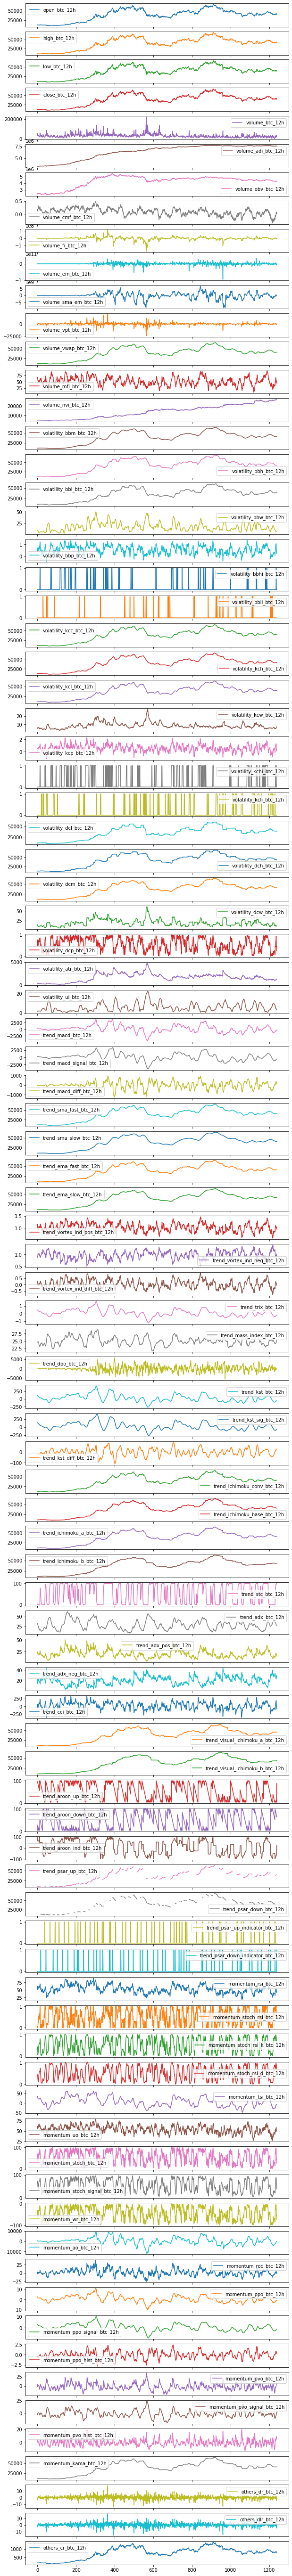

In [16]:
df.loc[:, pair_only_features].plot(subplots=True, figsize=(10, 100))

In [ ]:
df['momentum_kama_btc_12h'].plot()

In [ ]:
from fracdiff import fdiff

In [ ]:
fdiff(df['momentum_kama_btc_12h'], 0.5)

In [ ]:
plt.plot(fdiff(df['momentum_kama_btc_12h'], 1))

In [ ]:
df['momentum_kama_btc_12h'].plot(secondary_y=True)
df['volatility_kcw_btc_12h'].plot()

In [ ]:
from fracdiff.sklearn import Fracdiff

In [ ]:
X = df[['momentum_kama_btc_12h', 'volatility_kcw_btc_12h']]

f = Fracdiff(0.5)
X2 = f.fit_transform(X)

In [ ]:
plt.plot(X2[:, 0])

In [ ]:
plt.plot(X2[:, 1])

In [ ]:
X2

In [ ]:
from fracdiff.sklearn import FracdiffStat

In [ ]:
X = df[['momentum_kama_btc_12h', 'volatility_kcw_btc_12h']]

f = FracdiffStat()
X2 = f.fit_transform(X)
f.d_

In [ ]:
plt.plot(X2[:, 0])

In [ ]:
X2.shape

In [ ]:
X.shape